# VCF Filtration Cutoffs

In [94]:
# Import libraries and define functions
from cyvcf2 import VCF
import pandas as pd
import numpy as np
from plotnine import *

# info can be AC,AF,AN,DP,ExcessHet;FS;InbreedingCoeff;MLEAC;MLEAF;MQ;QD;SOR

def Filter(vcf_file, info, Min, Max, num_sites=100000, start_site=1000):
    r=[]
    t=[]
    vcf=VCF(vcf_file)

    for i, variant in enumerate(vcf):
        if i >= start_site and i < start_site + num_sites:
            if len(variant.ALT[0]) == 1 and variant.ALT[0] != "*":
                try:
                    if variant.INFO.get(info) > Min and variant.INFO.get(info) < Max:
                        r.append(variant.INFO.get(info))
                    t.append(variant.INFO.get(info))
                except TypeError:
                    print("TypeError caused by ", variant)
        elif i < start_site:
            pass
        else:
            break
    print(str((len(r)/len(t))*100) + "% retained")
    return(r,t)

#### Specify VCF file

In [35]:
vcf_file="/users/pmonnahan/Documents/Research/Mimulus-complex/vcfs/Mim_sNNffold_9_FULL_Variant_GATK.vcf.gz"

**Visualize Filtration**

TypeError caused by  sNNffold_9	535378	.	C	T	26.51	.	AC=2;AF=0.043;AN=46;DP=351;ExcessHet=0.0485;FS=0;InbreedingCoeff=0.3477;MLEAC=1;MLEAF=0.022;MQ=0;SOR=0.693	GT:AD:DP:GQ:PGT:PID:PL	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	0/0:5,0:5:9:.:.:0,9,135	./.:0,0:0:.:.:.:0,0,0	./.:1,0:1:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./.:1,0:1:.:.:.:0,0,0	./.:10,0:10:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	0/0:15,0:15:39:.:.:0,39,585	./.:0,0:0:.:.:.:0,0,0	0/0:10,0:10:12:.:.:0,12,180	./.:0,0:0:.:.:.:0,0,0	0/0:43,0:43:75:.:.:0,75,1125	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./.:.:.:.:.:.:.	./.:2,0:2:.:.:.:0,0,0	./.:5,0:5:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	0/0:25,0:25:48:.:.:0,48,720	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	./

/Users/pmonnahan/anaconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 36'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


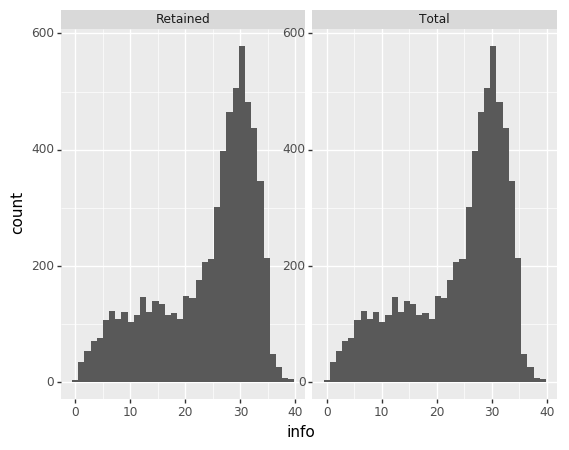

<ggplot: (-9223372036560727180)>

In [99]:
ret,tot = Filter(vcf_file, 'QD', 0,600,10000, 100000)

dat=pd.DataFrame({'info':ret, 'data':['Retained' for j in ret]})
dat=dat.append(pd.DataFrame({'info':tot, 'data':['Total' for j in tot]}))
(ggplot(dat,aes(x='info'))+geom_histogram()+facet_wrap('~data',scales='free'))

In [46]:
vcf=VCF(vcf_file)
for i, variant in enumerate(vcf):
#     print(variant)
    if i == 100000:
        var=variant
    elif i > 100000:
        break
print(var)

sNNffold_9	534660	.	C	*	443.05	.	AC=4;AF=0.037;AN=108;DP=677;ExcessHet=0.0358;FS=0;InbreedingCoeff=0.3241;MLEAC=3;MLEAF=0.028;QD=29.55;SOR=1.802	GT:AD:DP:GQ:PGT:PID:PL	0/0:1,0:1:3:.:.:0,3,42	./.:0,0:0:.:.:.:0,0,0	0/0:2,0:2:6:.:.:0,6,72	0/0:2,0:2:6:.:.:0,6,83	./.:0,0:0:.:.:.:0,0,0	0/0:3,0:3:6:.:.:0,6,90	0/0:1,0:1:3:.:.:0,3,29	./.:0,0:0:.:.:.:0,0,0	./.:3,0:3:.:.:.:0,0,0	0/0:3,0:3:9:.:.:0,9,88	./.:7,0:7:.:.:.:0,0,0	0/0:17,0:17:51:.:.:0,51,702	./.:0,0:0:.:.:.:0,0,0	0/0:1,0:1:3:.:.:0,3,39	0/0:12,0:12:33:.:.:0,33,495	./.:0,0:0:.:.:.:0,0,0	0/0:13,0:13:33:.:.:0,33,495	./.:0,0:0:.:.:.:0,0,0	0/0:5,0:5:15:.:.:0,15,167	./.:0,0:0:.:.:.:0,0,0	0/0:31,0:31:81:.:.:0,81,1215	./.:17,0:17:.:.:.:0,0,0	./.:0,0:0:.:.:.:0,0,0	1/1:0,5:5:15:1|1:534579_G_T:225,15,0	0/0:11,0:11:30:.:.:0,30,450	./.:.:.:.:.:.:.	./.:1,0:1:.:.:.:0,0,0	0/0:3,0:3:9:.:.:0,9,114	0/0:4,0:4:12:.:.:0,12,165	0/0:3,0:3:9:.:.:0,9,93	./.:0,0:0:.:.:.:0,0,0	0/0:23,0:23:66:.:.:0,66,990	1/1:0,6:6:21:.:.:273,21,0	./.:0,0:0:.:.:.:0,0,0	./.:0,0:0:.:.: